In [46]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [47]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv', sep=',')

In [48]:
print(df.shape)
print(df.info())

(5110, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [49]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [50]:
df.shape

(5110, 12)

In [51]:
basic_stat = round(df.describe(),2)
basic_stat

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [52]:
#info about data
print ("Rows     : " , df.shape[0])
print ("Columns  : " , df.shape[1])
print ("\nFeatures : \n" , df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values : \n",df.nunique())

Rows     :  5110
Columns  :  12

Features : 
 ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']

Missing values :   201

Unique values : 
 id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64


In [53]:
df.isnull().sum().sort_values(ascending=False)[:]

bmi                  201
stroke                 0
smoking_status         0
avg_glucose_level      0
Residence_type         0
work_type              0
ever_married           0
heart_disease          0
hypertension           0
age                    0
gender                 0
id                     0
dtype: int64

In [54]:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

In [55]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


<AxesSubplot:xlabel='age'>

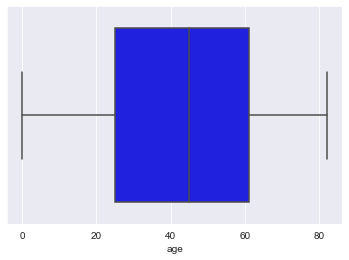

In [56]:
sns.boxplot(x='age',data=df , color = 'Blue')

<AxesSubplot:xlabel='avg_glucose_level'>

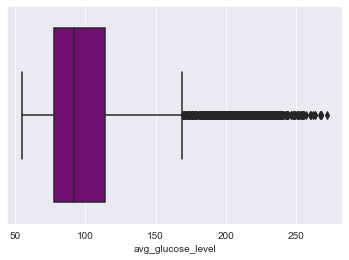

In [57]:
sns.boxplot(x='avg_glucose_level',data=df, color='Purple')

<AxesSubplot:xlabel='bmi'>

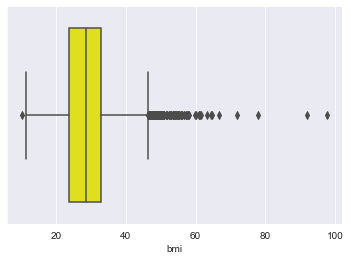

In [58]:
sns.boxplot(x='bmi',data=df, color = 'Yellow')

Text(0.5, 1.0, 'Stroke / Ever-Married')

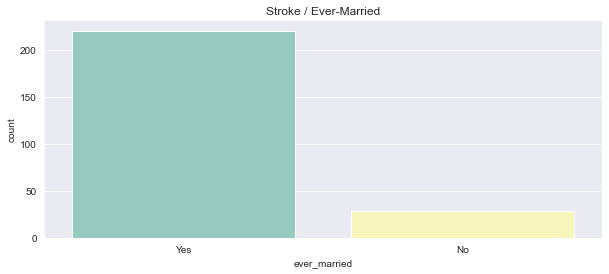

In [59]:
plt.figure(figsize=(10, 4))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='ever_married', palette="Set3")
plt.title("Stroke / Ever-Married")

Text(0.5, 1.0, 'Stroke / Work Type')

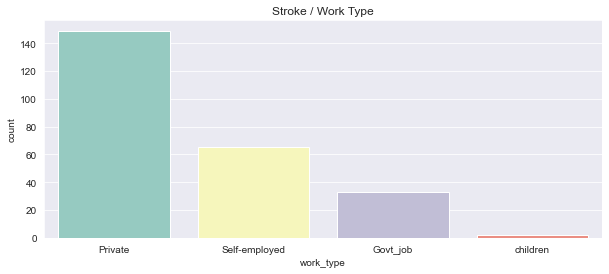

In [60]:
plt.figure(figsize=(10,4))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='work_type', palette="Set3")
plt.title("Stroke / Work Type")

Text(0.5, 1.0, 'Stroke / Smoking Status')

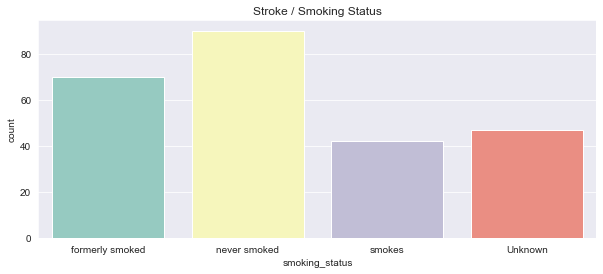

In [61]:
plt.figure(figsize=(10,4))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='smoking_status', palette="Set3")
plt.title("Stroke / Smoking Status")

Text(0.5, 1.0, 'Stroke / Residence Type')

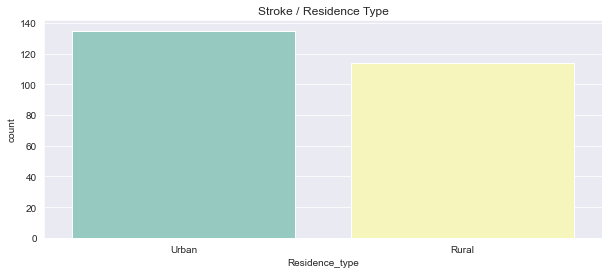

In [62]:
plt.figure(figsize=(10,4))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='Residence_type', palette="Set3")
plt.title("Stroke / Residence Type")

Text(0.5, 1.0, 'Stroke / Hypertension')

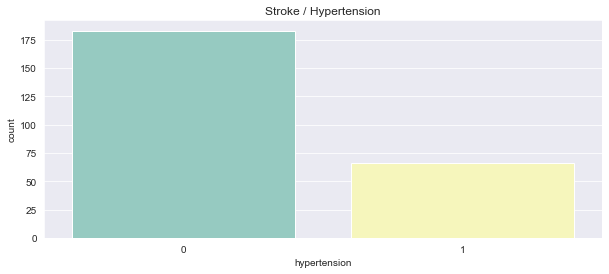

In [63]:
plt.figure(figsize=(10,4))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='hypertension', palette="Set3")
plt.title("Stroke / Hypertension")

Text(0.5, 1.0, 'Stroke / Heart Disease')

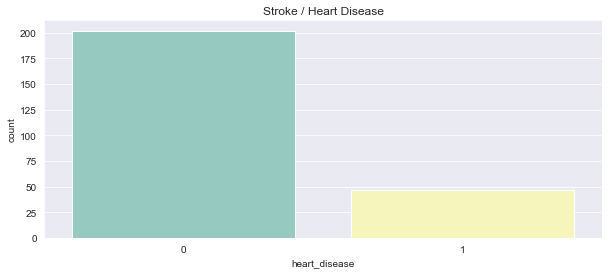

In [64]:
plt.figure(figsize=(10,4))
stroke = df.loc[df['stroke']==1]
sns.countplot(data=stroke,x='heart_disease', palette="Set3")
plt.title("Stroke / Heart Disease")

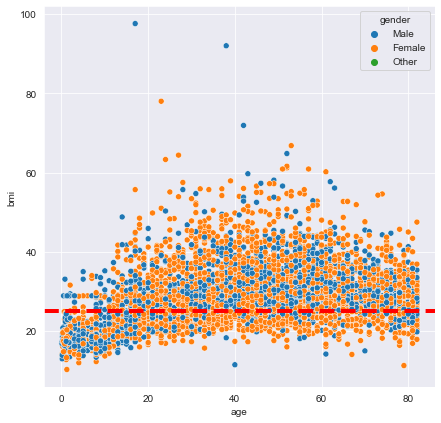

In [65]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='bmi',hue='gender')
graph.axhline(y=25, linewidth=4,color='r',linestyle= '--')

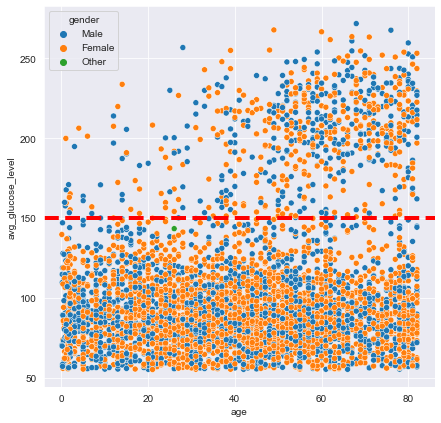

In [66]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=df,x='age',y='avg_glucose_level',hue='gender')
graph.axhline(y=150,linewidth=4,color='r',linestyle='--')

In [67]:
df['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [68]:
df['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [69]:
residence_mapping = {'Urban': 0, 'Rural': 1}
df['Residence_type'] = df['Residence_type'].map(residence_mapping)

In [70]:
marriage_mapping = {'No': 0, 'Yes': 1}
df['ever_married'] = df['ever_married'].map(marriage_mapping)

In [71]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,0,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,1,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,1,Private,1,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,1,Private,0,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,1,174.12,24.000000,never smoked,1


In [72]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [73]:
df['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [74]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [75]:
OHE = OneHotEncoder()

In [76]:
df['gender'] = pd.Categorical(df['gender'])
dfDummies_gender = pd.get_dummies(df['gender'], prefix = 'gender_encoded')
dfDummies_gender

,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [77]:
df['smoking_status'] = pd.Categorical(df['smoking_status'])
dfDummies_smoking_status = pd.get_dummies(df['smoking_status'], prefix = 'smoking_status_encoded')
dfDummies_smoking_status

,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


In [78]:
df['work_type'] = pd.Categorical(df['work_type'])
dfDummies_work_type = pd.get_dummies(df['work_type'], prefix = 'work_type_encoded')
dfDummies_work_type

,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [79]:
df.drop("gender", axis=1, inplace=True)
df.drop("work_type", axis=1, inplace=True)
df.drop("smoking_status", axis=1, inplace=True)

In [80]:
df = pd.concat([df, dfDummies_gender], axis=1)
df = pd.concat([df, dfDummies_work_type], axis=1)
df = pd.concat([df, dfDummies_smoking_status], axis=1)
df

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_encoded_Female,...,gender_encoded_Other,work_type_encoded_Govt_job,work_type_encoded_Never_worked,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes
0,9046,67.0,0,1,1,0,228.69,36.600000,1,0,...,0,0,0,1,0,0,0,1,0,0
1,51676,61.0,0,0,1,1,202.21,28.893237,1,1,...,0,0,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,1,1,105.92,32.500000,1,0,...,0,0,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,1,0,171.23,34.400000,1,1,...,0,0,0,1,0,0,0,0,0,1
4,1665,79.0,1,0,1,1,174.12,24.000000,1,1,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,1,0,83.75,28.893237,0,1,...,0,0,0,1,0,0,0,0,1,0
5106,44873,81.0,0,0,1,0,125.20,40.000000,0,1,...,0,0,0,0,1,0,0,0,1,0
5107,19723,35.0,0,0,1,1,82.99,30.600000,0,1,...,0,0,0,0,1,0,0,0,1,0
5108,37544,51.0,0,0,1,1,166.29,25.600000,0,0,...,0,0,0,1,0,0,0,1,0,0


In [81]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
columns = ['avg_glucose_level','bmi','age']
scaled = std.fit_transform(df[['avg_glucose_level','bmi','age']])
scaled = pd.DataFrame(scaled,columns=columns)
df=df.drop(columns=columns,axis=1)

In [82]:
df=df.merge(scaled, left_index=True, right_index=True, how = "left")
df

,id,hypertension,heart_disease,ever_married,Residence_type,stroke,gender_encoded_Female,gender_encoded_Male,gender_encoded_Other,work_type_encoded_Govt_job,...,work_type_encoded_Private,work_type_encoded_Self-employed,work_type_encoded_children,smoking_status_encoded_Unknown,smoking_status_encoded_formerly smoked,smoking_status_encoded_never smoked,smoking_status_encoded_smokes,avg_glucose_level,bmi,age
0,9046,0,1,1,0,1,0,1,0,0,...,1,0,0,0,1,0,0,2.706375,1.001234e+00,1.051434
1,51676,0,0,1,1,1,1,0,0,0,...,0,1,0,0,0,1,0,2.121559,1.384666e-15,0.786070
2,31112,0,1,1,1,1,0,1,0,0,...,1,0,0,0,0,1,0,-0.005028,4.685773e-01,1.626390
3,60182,0,0,1,0,1,1,0,0,0,...,1,0,0,0,0,0,1,1.437358,7.154182e-01,0.255342
4,1665,1,0,1,1,1,1,0,0,0,...,0,1,0,0,0,1,0,1.501184,-6.357112e-01,1.582163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,-0.494658,1.384666e-15,1.626390
5106,44873,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0.420775,1.442949e+00,1.670617
5107,19723,0,0,1,1,0,1,0,0,0,...,0,1,0,0,0,1,0,-0.511443,2.217363e-01,-0.363842
5108,37544,0,0,1,1,0,0,1,0,0,...,1,0,0,0,1,0,0,1.328257,-4.278451e-01,0.343796


In [83]:
y = df["stroke"]
X = df.drop(['stroke'],axis=1)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 5110
Total # of sample in train dataset: 3832
Total # of sample in test dataset: 1278


In [85]:
model_knn = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("-------------------------------------------")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,knn_predicted))

confussion matrix
[[1208    0]
 [  70    0]]
-------------------------------------------
Accuracy of K-NeighborsClassifier: 94.5226917057903 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278



In [86]:
model_lgr = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,lr_predict))

confussion matrix
[[1208    0]
 [  70    0]]
-------------------------------------------
Accuracy of Logistic Regression: 94.5226917057903 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278



In [87]:
model_rfc = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=10, random_state=101,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("-------------------------------------------")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print("-------------------------------------------")
print(classification_report(y_test,rf_predicted))

confussion matrix
[[1208    0]
 [  70    0]]
-------------------------------------------
Accuracy of Random Forest: 94.5226917057903 

-------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1208
           1       0.00      0.00      0.00        70

    accuracy                           0.95      1278
   macro avg       0.47      0.50      0.49      1278
weighted avg       0.89      0.95      0.92      1278

